In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.segments import * 
from trajectory.planner import * 
from trajectory.plot import * 
from trajectory.trapmath import * 
import matplotlib.pyplot as plt
from IPython.display import display
import trajectory as tj
import pandas as pd
import numpy as np
from math import sqrt
from random import randint, random
from operator import attrgetter
from itertools import chain
pd.set_option('display.max_columns', None)

ag_ha = attrgetter(*'t v_0 v_c v_1 a_max'.split())
ag = attrgetter(*'x t v_0 v_c v_1 v_0_max v_1_max'.split())

def ch(v):
    for e in chain(*v):
        if e is not None:
            yield e
            


In [29]:
list(range(max(-len(sl),-2), 0))

[-2, -1]

0.3000|[0        250↗   500@5000  ↘250        0] [0        145↗   850@3820  ↘4       3872] [0        140↗   750@3750  ↘109     5000] 0
0.2500|[0          0↗     0@0     ↘0          0] [3872     150↗     0@0     ↘150     3872] [5000       0↗  1000@5000  ↘0       5000] 0
0.2500|[0        250↗   750@5000  ↘0       5000] [3872      22↗   856@4150  ↘122     2236] [5000      97↗   805@3904  ↘97      5000] 0
0.2500|[5000       0↗   750@5000  ↘250        0] [2236      49↗    50@244   ↘0          0] [5000       0↗   750@5000  ↘250        0] 0


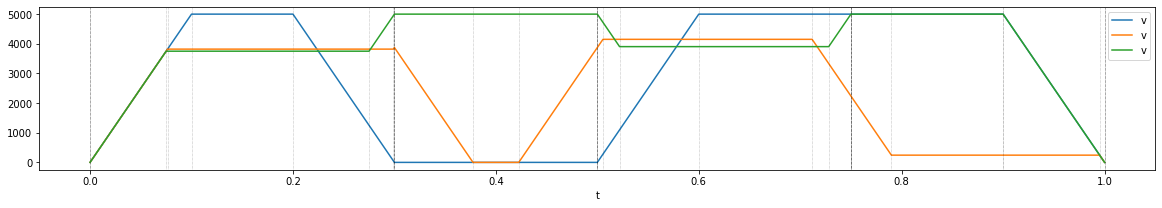

,t,seg,axis,x,v_i,v_f,ss,del_t,v0m,v1m,calc_x,err
0,0.100000,0,0,250.0,0.00,5000.00,a,0.100000,5000,5000,250.000000,0.000000
1,0.200000,0,0,500.0,5000.00,5000.00,c,0.100000,5000,5000,500.000000,0.000000
2,0.300000,0,0,250.0,5000.00,0.00,d,0.100000,5000,5000,250.000000,0.000000
3,0.076400,0,1,146.0,0.00,3820.00,a,0.076400,5000,5000,145.924000,0.076000
4,0.298940,0,1,850.0,3820.00,3820.00,c,0.222540,5000,5000,850.103946,-0.103946
5,0.300000,0,1,4.0,3820.00,3872.98,d,0.001060,5000,5000,4.076125,-0.076125
6,0.075000,0,2,141.0,0.00,3750.00,a,0.075000,5000,5000,140.625000,0.375000
7,0.275000,0,2,750.0,3750.00,3750.00,c,0.200000,5000,5000,750.000000,0.000000
8,0.300000,0,2,109.0,3750.00,5000.00,d,0.025000,5000,5000,109.375000,-0.375000
9,0.300000,1,0,0.0,0.00,0.00,a,0.000000,5000,5000,0.000000,0.000000


In [44]:
j = Joint(5_000, 50_000)
joints = [j]*3

sl = SegmentList(joints)   
s = sl.rmove([1000,1000,1000])
s = sl.rmove([0,   300,1000])
s = sl.rmove([1000,1000,1000])
s = sl.rmove([1000,100,1000])


ag = attrgetter(*'x t t_a t_c t_d'.split())

def update(self,start = None):

    if start is None:
        start = max(-len(self),-4)

    for i in range(start, 0):
        w = self.get_window(i)  # columns; each is a segment
        pu = False
        for p, c, n in zip(*w):
            pu = pu or update_boundary_velocities(p, c, n)
            assert not pu

        update_segment(w[1])


update(sl, -len(sl))
update(sl, -len(sl))

print(sl)
sl.plot(); plt.show()
sl.dataframe

In [ ]:
ag = attrgetter(*'x t v_0 v_c v_1 t_a t_c t_d '.split())



In [ ]:
p=Params(x=1000.0, t=0.30000000000000004, t_a=0.1, t_c=0.20000000000000004, t_d=0, x_a=250.00000000000006, x_c=1000.0000000000002, 
       x_d=0, v_0=0, v_c=5000, v_1=5000, v_0_max=5000, v_0_min=0, v_1_max=5000, v_1_min=0, v_max=5000, a_max=50000, t_min=0.25, 
       d=1, ip={'x': 1000.0, 'v_0': 0, 'v_1': 5000, 'v_max': 5000, 'a_max': 50000}, flag='C', recalcs=0)

ag = attrgetter(*'x t v_0 v_c v_1 t_a t_c t_d '.split())

print(ag(p))
print(hex_v_c(p.x, p.t, p.v_0, p.v_1, p.v_max, p.a_max))

update_params(p, 0.3)
#p2 = min_time_parameters_p(p)
print(ag(p2))
p

In [ ]:
750/5000

In [ ]:
p = Params(x=300.0, t=0.11000000000000001, t_a=0, t_c=0.01000000000000001, t_d=0.1, x_a=0, x_c=50.00000000000006, x_d=249.99999999999994, 
       v_0=5000, v_c=5000, v_1=5000, v_0_max=5000, v_0_min=0, v_1_max=5000, v_1_min=0, v_max=5000, a_max=50000, t_min=0.11000000000000001, 
       d=1, ip=InputParams(x=300, v_0=5000, v_1=0, v_max=5000, a_max=50000), flag='C', recalcs=0)

ag = attrgetter(*'x t v_0 v_c v_1 t_a t_c t_d '.split())

print(ag(p))
print(hex_v_c(p.x, p.t, p.v_0, p.v_1, p.v_max, p.a_max))

hex_area(0.06, p.v_0, 5000, p.v_1, p.a_max)

In [ ]:



def aca(e):
    if e[0]:
        assert_consistent_area(e[0])

    assert_consistent_area(e[1])
    if e[2]:
        assert_consistent_area(e[2])
   
def _update(sl, index):

    w = sl.get_window(index)

    m = [save_for_change(s) for s in w ]
    
    for e in w:
        update_segment(e)
   
    for e in zip(*w):
        aca(e)
        update_boundary_velocities(*e)
                  
    for p in chain(*w):
        min_time_parameters_p(p, inplace = True)
        
    index += idx_change
    return index

def update(sl):
    index = -1
    for i in range(10):
        index =  _update(sl,index)
        print("Loop", i, 'index', index)
        if index == 0:
            break
    else:
        assert False, "Update overflow"
            
    sl.plot(); plt.show()

sl = SegmentList(joints)   
s = sl.rmove([1000,1000])
update(sl); sl.plot(); plt.show()
s = sl.rmove([0,   300])
update(sl); sl.plot(); plt.show()
s = sl.rmove([1000,1000])
update(sl); sl.plot(); plt.show()
s = sl.rmove([1000,1000])
update(sl); sl.plot(); plt.show()

#for i in range(-len(sl), 0):
#    _update(sl, i)
#    sl.plot(); plt.show()

In [ ]:
mx = 100
v = 0
mn = 10

max(min(v, mx), mn)

In [ ]:
[e.flag  if e is not None else None for e in chain(*sl.get_window(-len(sl)))]

In [ ]:
c = sl.get_window(-len(sl)) # columns; each is a segment
r = list(zip(*w))[0]  # each is a joint

if False:
    [clear_segment_flags(p) for p in r]
    print(update_boundary_velocities(*r))
    [ update_segment(e) for e in w]
    [min_time_parameters_p(p, inplace = True, as_needed=True) for p in chain(*w)]

print([j.updated if j else None for j in r])
#ag(w[1][1]), ag(w[2][1])
